In [ ]:
# Decision Tree _ensemble_learning 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("BreastCancer.csv")

In [3]:
df=data.copy()
df.head(2)

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0


In [4]:
df.isnull().sum()

Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [5]:
# although in medical data set it is not recoomended to use imputation approach
# but just fpor learning we are doing .
df["Bare.nuclei"]=df["Bare.nuclei"].fillna(df["Bare.nuclei"].mean())

In [6]:
df.isnull().sum().sum()

0

In [8]:
df["Class"].value_counts(normalize=True)

0    0.655222
1    0.344778
Name: Class, dtype: float64

In [10]:
X=df.drop(["Id",'Class'],axis=1)
Y=df["Class"]

# for the tree based algorithms --- Scaling and outlier treatment is not required

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

In [19]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
# Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
#dt=DecisionTreeClassifier(class_weight="balanced",criterion='gini',max_depth=None,min_samples_split=4,ccp_alpha=0)
dt=DecisionTreeClassifier(class_weight="balanced",criterion='entropy',max_depth=None,min_samples_split=4,ccp_alpha=0)

In [62]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0, class_weight='balanced',
                       criterion='entropy', min_samples_split=4)

In [63]:
Y_pred_test=dt.predict(X_test)

In [64]:
accuracy_score(Y_test,Y_pred_test)

0.9142857142857143

In [65]:
dt.score(X_test,Y_test)

0.9142857142857143

In [66]:
dt.score(X_train,Y_train)

0.9910554561717353

In [55]:
# drawing the tree

In [56]:
from sklearn import tree

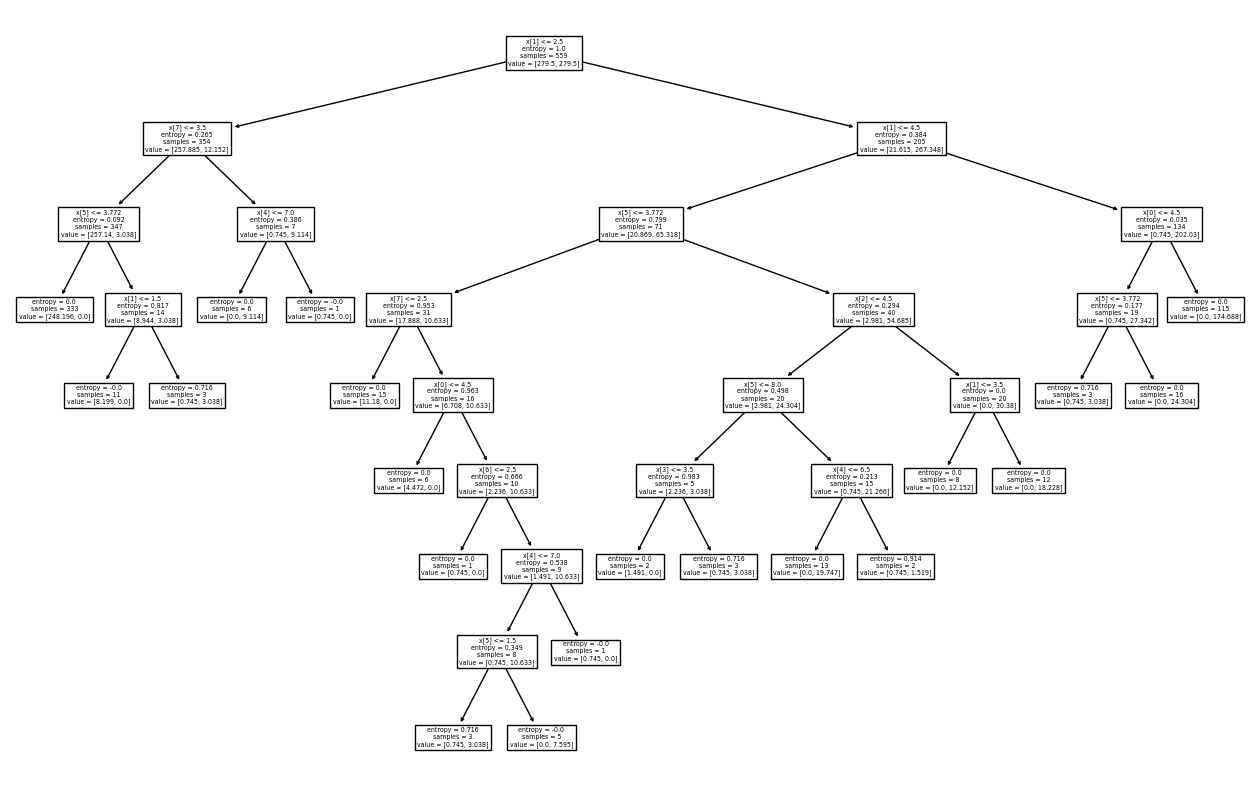

In [67]:
plt.figure(figsize=(16,10))
tree.plot_tree(dt)
plt.show()

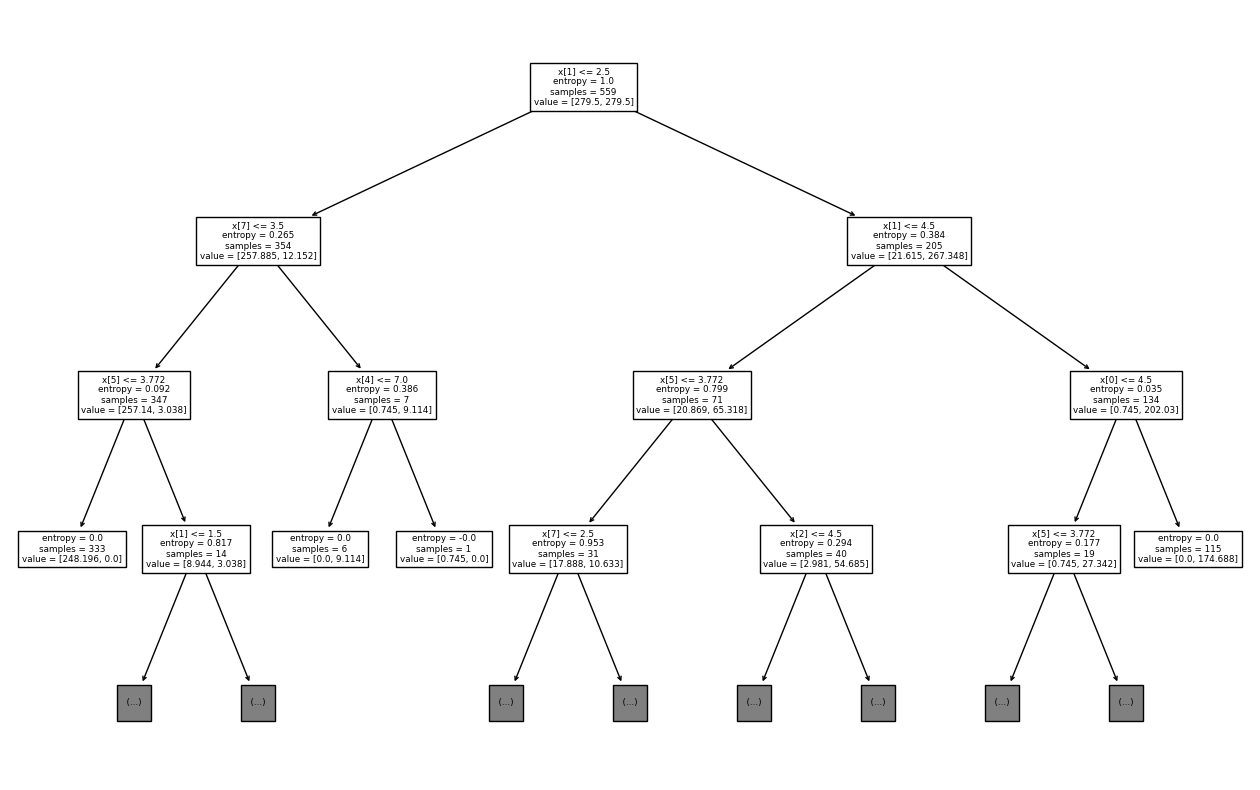

In [69]:
plt.figure(figsize=(16,10))
tree.plot_tree(dt,max_depth=3)
plt.show()

In [70]:
# cross validation approach
from sklearn.model_selection import cross_val_score,KFold


In [71]:
kf=KFold(n_splits=5)
DT=DecisionTreeClassifier(class_weight="balanced",criterion='entropy',max_depth=None,min_samples_split=4,ccp_alpha=0)

In [72]:
scores=cross_val_score(DT,X,Y,cv=kf,scoring="accuracy")

print(scores)

[0.89285714 0.94285714 0.92142857 0.96428571 0.96402878]


In [73]:
np.mean(scores)

0.9370914696813978

In [74]:
np.std(scores)

0.02720437649517574

# hyper parameter optimization

In [ ]:
(1)GridSearchCV- 
(2)RandomizedSearchCV

In [75]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV

In [76]:
dt=DecisionTreeClassifier()

In [77]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [78]:
param_grid={"criterion":["gini","entropy"],
           "splitter":["best","random"],
           "max_depth":(2,20,1)}

In [79]:
param_grid

{'criterion': ['gini', 'entropy'],
 'splitter': ['best', 'random'],
 'max_depth': (2, 20, 1)}

In [80]:
random_dt=RandomizedSearchCV(dt,param_grid,cv=5,n_iter=40)

In [81]:
%%time 
random_dt.fit(X,Y)
print("best parameters", random_dt.best_params_)


best parameters {'splitter': 'random', 'max_depth': 20, 'criterion': 'entropy'}
CPU times: total: 703 ms
Wall time: 870 ms


In [ ]:
# random_dt will be the version of dt (decisiontree having optimized parameters)

In [82]:
random_dt.best_score_

0.9413463514902365

In [83]:
random_dt.score(X_train,Y_train)

1.0

In [84]:
random_dt.score(X_test,Y_test)

1.0

# grid search CV

In [87]:
grid_dt=GridSearchCV(dt,param_grid,cv=5)

In [89]:
%%time 
grid_dt.fit(X,Y)
print("best parameters", grid_dt.best_params_)


best parameters {'criterion': 'entropy', 'max_depth': 20, 'splitter': 'best'}
CPU times: total: 641 ms
Wall time: 724 ms


In [90]:
grid_dt.best_score_

0.9370606372045222

In [93]:
grid_dt.score(X_train,Y_train)

1.0

In [94]:
grid_dt.score(X_test,Y_test)

1.0

In [ ]:
# Ensemble learning -- WE ARE TAKING THE ADVICE FROM DIFFERNT CONSULTANTS

In [ ]:
(1)Bagging method--- Random forest , Bagging
(2)Boosting Method---adaboost , gradient boosting,XGBoost,Catboost,lightGBM
(3)Voting approach---we apply different algo(DT,RF,KNN,SVM,ADB,XGB)- soft voting/hard voding 
(4)Stacking approach----we apply different algo(DT,RF,KNN,SVM,ADB,XGB)-- it will make one algo(for example logistic regression ) 
as the most powerful. 

In [ ]:
# PCA -- IN DETAIL-   LDA, T-SEN
# CLUSTERING APPROACH (unsupervised ML) ---
#  Naive bayes --

In [ ]:
# project session 